In [1]:
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable
import matplotlib.pyplot as plt

# 基本的

In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

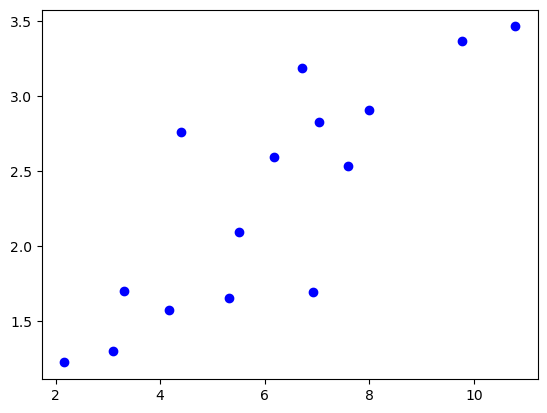

In [3]:
# 画出图像

%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [4]:
## 将x和y转为torch变量。
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)


In [5]:
## 定义一下w，b。注意，这俩都是要grad的，他们是要计算梯度要更新的。
w = Variable(torch.randn(1), requires_grad = True) ## 这个随机给值。
b = Variable(torch.zeros(1), requires_grad = True) ## 这个初始化为0.

In [6]:
w

tensor([-0.7358], requires_grad=True)

In [7]:
b

tensor([0.], requires_grad=True)

In [8]:
z = w * x_train + b

In [9]:
# 构建线性回归模型
x_train = Variable(x_train) ## 训练数据，就不需要算梯度了。
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [10]:
y_ = linear_model(x_train)

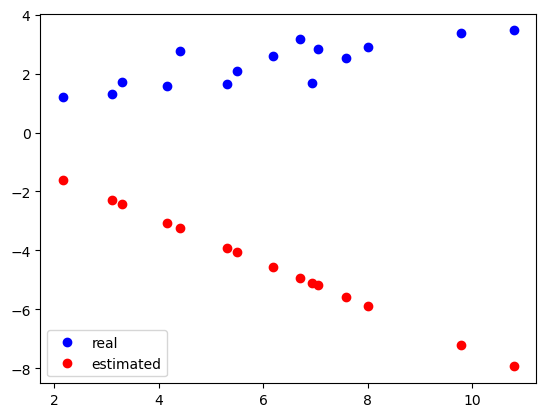

In [11]:
plt.plot(x_train.data, y_train.data, 'bo', label='real') ## 
plt.plot(x_train.data, y_.data, 'ro', label='estimated')
plt.legend()

In [12]:
loss = torch.mean((y_ - y_train) ** 2)

In [13]:
loss.backward() ## 应该就是链式求导了，根据现在的现状进行一个求导。

In [14]:
## 求导完之后就能看到各个变量的梯度了

In [15]:
w.grad.data

tensor([-93.3686])

In [16]:
b.grad.data

tensor([-13.5740])

In [17]:
## 参数更新：

In [18]:
learning_rate = 1e-2

w.data = w.data - learning_rate * w.grad.data
b.data = b.data - learning_rate * b.grad.data

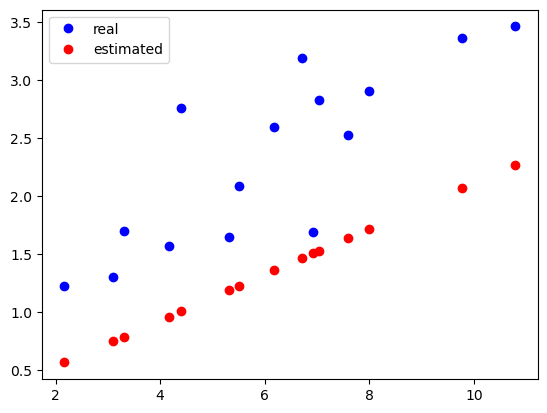

In [19]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [20]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = torch.mean((y_ - y_train) ** 2)
    
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    
    print('epoch: {}, loss: {}'.format(e, loss), w.grad, b.grad)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度

epoch: 0, loss: 1.1680901050567627 tensor([-106.0516]) tensor([-15.5516])
epoch: 1, loss: 37.0389404296875 tensor([78.9790]) tensor([11.1966])
epoch: 2, loss: 0.8954640030860901 tensor([10.7629]) tensor([1.3932])
epoch: 3, loss: 0.2263403981924057 tensor([1.4828]) tensor([0.0598])
epoch: 4, loss: 0.21373148262500763 tensor([0.2203]) tensor([-0.1212])
epoch: 5, loss: 0.21327370405197144 tensor([0.0485]) tensor([-0.1455])
epoch: 6, loss: 0.21304196119308472 tensor([0.0251]) tensor([-0.1485])
epoch: 7, loss: 0.212815523147583 tensor([0.0219]) tensor([-0.1486])
epoch: 8, loss: 0.2125902771949768 tensor([0.0214]) tensor([-0.1482])
epoch: 9, loss: 0.2123662531375885 tensor([0.0213]) tensor([-0.1479])


# 多项式

In [21]:
# 定义一个多变量函数
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


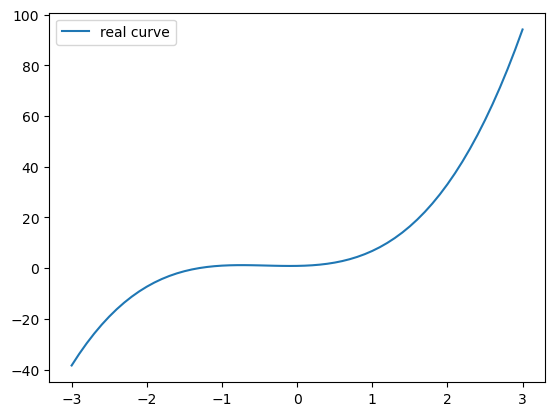

In [22]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [23]:
## 接下来，我们就要进行一波操作，使用梯度下降法。

In [24]:
x_train = Variable(
    torch.from_numpy(np.stack([x_sample.astype(np.float32) ** i for i in [1,2,3]], axis=1))
)
y_train = Variable(torch.from_numpy(y_sample.astype(np.float32)).unsqueeze(1))

In [25]:
w = Variable(torch.randn(3, 1), requires_grad = True)
b = Variable(
    torch.zeros(1), # torch.randn(1, 1), 
    requires_grad = True
)

In [26]:
def fwd(x):
    return torch.mm(x, w) + b

def calc_loss(y_, y):
    return torch.mean((y_ - y) ** 2)

In [27]:
lr = 1e-3 ## 有一次我跑的时候，把这个设置太大了，导致一直震荡，无法收敛。

In [28]:
for _ in range(100):
    y_ = fwd(x_train)
    loss = calc_loss(y_, y_train)
    
    loss.backward() ## 链式求导，反向传播。
    
    w.data = w.data - lr * w.grad.data ## 更新参数
    b.data = b.data - lr * b.grad.data
    
    w.grad.data.zero_() ## zero就是归零，带一个下划线说明是inplace更新。
    b.grad.data.zero_() ## 不归零的话，算出来的梯度就会一直累积。这里我们不需要梯度的累积。
    
    if _ % 20 == 0:
        print(
            f"epoch: {_}, loss: {loss}"
        )

epoch: 0, loss: 175.51898193359375
epoch: 20, loss: 18.18519401550293
epoch: 40, loss: 4.343535423278809
epoch: 60, loss: 1.1102417707443237
epoch: 80, loss: 0.35233619809150696


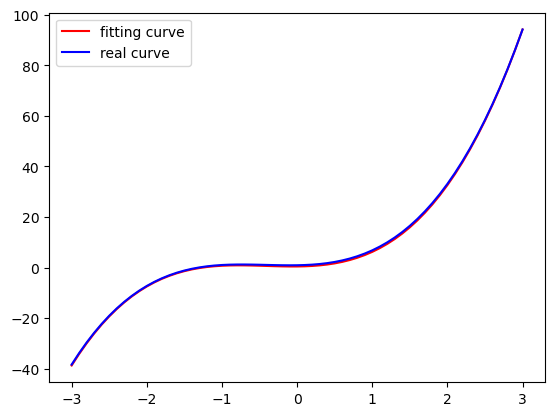

In [29]:
# 画出更新之后的结果
y_pred = fwd(x_train)

plt.plot(
    x_train.data.numpy()[:, 0], ## 这一列其实就是x的一次方，也就是x本体。
    y_pred.data.numpy(), 
    label='fitting curve', color='r'
)
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

# 总结

In [ ]:
## 确定哪些参数是需要算梯度的，要给它设置requires_grad=True。
## lr太大，会震荡的，不收敛。
## 更新参数的流程大概是：算y_，算loss，求导，用参数的梯度和lr来更新参数，梯度归零（不要累积梯度）。